In [264]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [265]:
data = pd.read_csv("../datasets/Fish.csv")

In [266]:
data.groupby(["Species"]).describe()

print(data)

    Species  Weight  Length1  Length2  Length3   Height   Width
0     Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1     Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2     Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3     Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4     Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
..      ...     ...      ...      ...      ...      ...     ...
154   Smelt    12.2     11.5     12.2     13.4   2.0904  1.3936
155   Smelt    13.4     11.7     12.4     13.5   2.4300  1.2690
156   Smelt    12.2     12.1     13.0     13.8   2.2770  1.2558
157   Smelt    19.7     13.2     14.3     15.2   2.8728  2.0672
158   Smelt    19.9     13.8     15.0     16.2   2.9322  1.8792

[159 rows x 7 columns]


In [267]:
def Sigmoid(z):
    return 1/(1+np.exp(-z))

In [268]:
def h(x,theta):
    return Sigmoid(x.dot(theta))

In [269]:
def J(X,y,theta,m):
    hx = h(X,theta)
    return (-y.transpose().dot(np.log(hx))-(1-y.transpose()).dot(np.log(1-hx)))/m

In [270]:
def Gradient(X,theta,lr,m):
    return theta - lr*X.transpose().dot(h(X,theta)-y)/m

In [271]:
dic = {"Bream":0,"Perch":1}

breams = data.loc[ data["Species"] == "Bream"]
perchs = data.loc[ data["Species"] == "Perch"]

bv = breams.drop(["Species"],axis=1)
pv = perchs.drop(["Species"],axis=1)

data_bp =  breams.append(perchs)

X =  bv.append(pv)
X = (X - X.mean())/X.std()

breams = data_bp.insert(1,"",1)

print(data_bp)

lr = 0.003

y = data_bp["Species"]

print(y)

y = y.replace(dic).values


print(X,X.shape)

X = X.values

n = X.shape[1]
m = y.size

EPOCH = 10000

theta = np.random.random(n)

    Species     Weight  Length1  Length2  Length3   Height   Width
0     Bream  1   242.0     23.2     25.4     30.0  11.5200  4.0200
1     Bream  1   290.0     24.0     26.3     31.2  12.4800  4.3056
2     Bream  1   340.0     23.9     26.5     31.1  12.3778  4.6961
3     Bream  1   363.0     26.3     29.0     33.5  12.7300  4.4555
4     Bream  1   430.0     26.5     29.0     34.0  12.4440  5.1340
..      ... ..     ...      ...      ...      ...      ...     ...
123   Perch  1  1100.0     39.0     42.0     44.6  12.8002  6.8684
124   Perch  1  1000.0     39.8     43.0     45.2  11.9328  7.2772
125   Perch  1  1100.0     40.1     43.0     45.5  12.5125  7.4165
126   Perch  1  1000.0     40.2     43.5     46.0  12.6040  8.1420
127   Perch  1  1000.0     41.1     44.0     46.6  12.4888  7.5958

[91 rows x 8 columns]
0      Bream
1      Bream
2      Bream
3      Bream
4      Bream
       ...  
123    Perch
124    Perch
125    Perch
126    Perch
127    Perch
Name: Species, Length: 91, dty

In [272]:
for i in range(EPOCH):
    theta = Gradient(X,theta,lr,m)
    print(J(X,y,theta,m))

2.0942823551186494
2.0882605514531467
2.0822447429079323
2.0762349679741714
2.0702312653702246
2.0642336740420864
2.058242233163805
2.052256982137878
2.0462779605956247
2.040305208397537
2.0343387656336076
2.0283786726236337
2.0224249699174943
2.0164776982954034
2.0105368987681413
2.0046026125772487
1.9986748811952104
1.9927537463255942
1.9868392499031708
1.9809314340940094
1.9750303412955301
1.9691360141365384
1.9632484954772236
1.957367828409126
1.951494056255074
1.9456272225690878
1.9397673711362469
1.9339145459725264
1.9280687913246006
1.922230151669604
1.9163986717148642
1.910574396397593
1.9047573708845413
1.8989476405716146
1.893145251083453
1.8873502482729667
1.8815626782208343
1.875782587234958
1.8700100218498805
1.8642450288261514
1.8584876551496603
1.8527379480309174
1.8469959549042925
1.8412617234272106
1.8355353014792937
1.8298167371614629
1.8241060787949905
1.8184033749204993
1.8127086742969165
1.807022025900376
1.8013434789230673
1.795673082772038
1.7900108870679363
1.78

0.5620481048863059
0.5612085228166412
0.5603747557790514
0.5595467571545646
0.5587244806421238
0.5579078802582033
0.557096910336376
0.5562915255268336
0.555491680795861
0.5546973314252638
0.5539084330117539
0.5531249414662908
0.5523468130133821
0.5515740041903434
0.5508064718465187
0.5500441731424627
0.5492870655490868
0.5485351068467673
0.547788255124421
0.5470464687785449
0.5463097065122243
0.5455779273341091
0.5448510905573594
0.5441291557985594
0.5434120829766066
0.5426998323115688
0.5419923643235174
0.5412896398313333
0.5405916199514879
0.5398982660968005
0.5392095399751727
0.5385254035882991
0.537845819230358
0.537170749486681
0.5365001572324025
0.5358340056310901
0.5351722581333579
0.5345148784754605
0.533861830677873
0.5332130790438511
0.5325685881579801
0.5319283228847079
0.5312922483668626
0.5306603300241592
0.5300325335516937
0.5294088249184237
0.5287891703656399
0.5281735364054256
0.5275618898191082
0.5269541976556986
0.5263504272303245
0.5257505461226553
0.5251545221753172

0.32481290924491363
0.3247444929454596
0.32467610255943347
0.32460773807305865
0.3245393994725723
0.32447108674422587
0.3244027998742844
0.3243345388490271
0.3242663036547468
0.3241980942777505
0.3241299107043585
0.3240617529209053
0.32399362091373857
0.3239255146692201
0.3238574341737249
0.3237893794136417
0.3237213503753728
0.3236533470453336
0.3235853694099533
0.3235174174556742
0.3234494911689521
0.3233815905362559
0.3233137155440679
0.32324586617888335
0.3231780424272111
0.32311024427557256
0.32304247171050243
0.3229747247185487
0.32290700328627187
0.3228393074002457
0.32277163704705664
0.32270399221330426
0.3226363728856007
0.32256877905057085
0.32250121069485277
0.32243366780509647
0.32236615036796534
0.3222986583701351
0.32223119179829385
0.32216375063914243
0.3220963348793943
0.32202894450577507
0.32196157950502297
0.32189423986388865
0.321826925569135
0.32175963660753726
0.3216923729658827
0.3216251346309714
0.32155792158961516
0.32149073382863796
0.32142357133487626
0.321356

0.24518873596168297
0.24514798847521327
0.24510725377747086
0.24506653186287938
0.24502582272586526
0.2449851263608583
0.24494444276229105
0.24490377192459878
0.24486311384222015
0.24482246850959646
0.2447818359211721
0.24474121607139418
0.24470060895471302
0.2446600145655818
0.2446194328984566
0.24457886394779654
0.24453830770806353
0.2444977641737225
0.24445723333924116
0.24441671519909056
0.2443762097477441
0.24433571697967868
0.2442952368893737
0.2442547694713117
0.24421431471997812
0.24417387262986118
0.2441334431954522
0.2440930264112454
0.24405262227173777
0.24401223077142928
0.243971851904823
0.2439314856664246
0.2438911320507429
0.24385079105228938
0.24381046266557876
0.24377014688512846
0.24372984370545878
0.24368955312109294
0.24364927512655715
0.24360900971638044
0.24356875688509472
0.24352851662723488
0.2434882889373385
0.2434480738099464
0.24340787123960198
0.24336768122085156
0.2433275037482446
0.24328733881633313
0.24324718641967216
0.2432070465528198
0.2431669192103365

0.18913364009561168
0.18910889588353127
0.18908415798512015
0.1890594263980642
0.18903470112005047
0.18900998214876685
0.18898526948190264
0.18896056311714782
0.1889358630521938
0.18891116928473276
0.18888648181245823
0.1888618006330646
0.18883712574424755
0.18881245714370343
0.18878779482913022
0.18876313879822645
0.18873848904869214
0.18871384557822807
0.18868920838453615
0.1886645774653195
0.18863995281828222
0.1886153344411295
0.18859072233156735
0.18856611648730337
0.1885415169060457
0.18851692358550387
0.18849233652338826
0.1884677557174106
0.1884431811652834
0.18841861286472028
0.18839405081343605
0.1883694950091465
0.18834494544956837
0.18832040213241974
0.18829586505541948
0.18827133421628767
0.18824680961274542
0.1882222912425148
0.18819777910331914
0.1881732731928825
0.1881487735089304
0.188124280049189
0.1880997928113859
0.18807531179324952
0.18805083699250938
0.18802636840689607
0.18800190603414121
0.1879774498719775
0.1879529999181387
0.1879285561703596
0.1879041186263759

0.15356741808808627
0.1535509977129328
0.15353458082237192
0.15351816741532362
0.15350175749070816
0.15348535104744634
0.15346894808445932
0.1534525486006688
0.1534361525949968
0.15341976006636573
0.15340337101369864
0.15338698543591872
0.15337060333194988
0.15335422470071636
0.1533378495411427
0.15332147785215403
0.15330510963267593
0.15328874488163421
0.15327238359795523
0.15325602578056594
0.1532396714283934
0.15322332054036533
0.1532069731154099
0.15319062915245546
0.15317428865043098
0.1531579516082659
0.15314161802489004
0.15312528789923358
0.15310896123022713
0.15309263801680187
0.15307631825788928
0.15306000195242123
0.1530436890993301
0.1530273796975487
0.15301107374601033
0.15299477124364852
0.15297847218939734
0.15296217658219133
0.1529458844209654
0.15292959570465492
0.15291331043219566
0.15289702860252374
0.15288075021457584
0.152864475267289
0.1528482037596008
0.15283193569044887
0.1528156710587718
0.15279940986350818
0.15278315210359725
0.15276689777797853
0.152750646885

0.13121417871181174
0.13120218107875703
0.13119018564427595
0.13117819240777476
0.13116620136865997
0.13115421252633822
0.13114222588021637
0.13113024142970156
0.13111825917420103
0.13110627911312228
0.13109430124587299
0.13108232557186117
0.1310703520904949
0.13105838080118248
0.13104641170333253
0.13103444479635384
0.13102248007965522
0.13101051755264595
0.1309985572147353
0.13098659906533297
0.1309746431038488
0.1309626893296926
0.13095073774227473
0.13093878834100556
0.13092684112529568
0.130914896094556
0.13090295324819748
0.13089101258563138
0.13087907410626923
0.1308671378095226
0.13085520369480336
0.13084327176152358
0.13083134200909563
0.13081941443693196
0.13080748904444517
0.13079556583104826
0.13078364479615429
0.1307717259391766
0.13075980925952868
0.1307478947566242
0.1307359824298772
0.1307240722787018
0.13071216430251234
0.13070025850072328
0.13068835487274943
0.13067645341800582
0.13066455413590752
0.1306526570258699
0.1306407620873086
0.13062886931963935
0.13061697872

In [273]:
ys = []
yp = []

print(X[0])
for i in range(m):
    if(h(X[i],theta) < 0.5):
        ys.append(0)
    else:
        ys.append(1)
        
for i in range(m):
    yp.append(h(X[i],theta))

[-0.71700218 -0.58065824 -0.57122232 -0.3287586   0.19147284 -0.66123453]


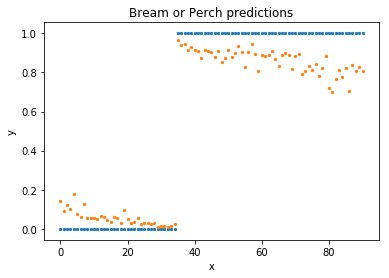

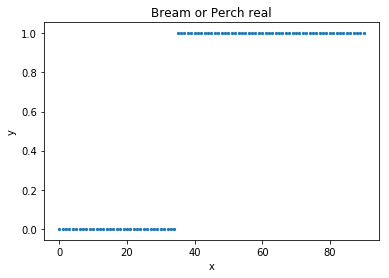

In [274]:
x = range(m)


plt.scatter(x,ys,s=5)
plt.scatter(x,yp,s=5)
plt.title('Bream or Perch predictions')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

plt.scatter(x,y,s=5)
plt.title('Bream or Perch real')
plt.xlabel('x')
plt.ylabel('y')

plt.show()